In [43]:
import numpy as np
import math
from estimates_calculations import Concept, MAP, MLE, MAP_value, MLE_value, MAP_arg, MLE_arg
from matplotlib import pyplot as plt
from concepts_database import gen_base_concepts, odd, even, multiplies_of_N, powers_of_2

In [44]:
base_concepts = [Concept('power_of_2', 
                         lambda x: 2 ** int(math.log(x,2)) == x, 
                         0.2),
                 Concept('even',
                         lambda x: x%2 == 0,
                         0.2),
                 Concept('odd',
                         lambda x: x%2 == 1,
                         0.2),
                 Concept('multiples_of_3',
                         lambda x: x%3==0,
                         0.1),
                 Concept('multiples_of_10',
                         lambda x: x%10==0,
                         0.1)
                ]

Concept.normalize_priors(base_concepts)
for c in base_concepts: print(c)

Name: power_of_2,         	Prior: 0.25,	Size: 511
Name: even,               	Prior: 0.25,	Size: 62750
Name: odd,                	Prior: 0.25,	Size: 62500
Name: multiples_of_3,     	Prior: 0.12,	Size: 41583
Name: multiples_of_10,    	Prior: 0.12,	Size: 12750


In [45]:
def gen_from_concept(concept, size):
    dataset = concept.gen_dataset()
    return np.random.choice(dataset, size=size)    

In [32]:
base_concepts[3].prior = 0.0675

In [47]:
concepts = [
    Concept('c1', lambda x: x in [1,11,22,33,44,55,66,77,88,99,110,121,132,143,154,165,176,187,198], 0.8),
    Concept('c2', lambda x: x in [22,44,66,88,110,132,154,176,198], 0.1),
    Concept('c2', lambda x: x in [1,11,33,55,77,99,121,143,165,187], 0.2),
    Concept('c3', lambda x: x in [11,22,44,55,77,88,110,121,143,154,176,187], 0.05),
    Concept('c4', lambda x: x in [1,2,3,4,11,12,13,14,22,44,49,55,77,88,110,121], 0.25)

]
Concept.normalize_priors(concepts)

In [57]:
def decisions_for_nth_concept(n, max_size=50):
    sizes = np.asarray(list(range(0, max_size)))
    data = gen_from_concept(concepts[n], max_size)

    maps = [MAP_arg(data[:x], concepts) for x in sizes]
    mles = [MLE_arg(data[:x], concepts) for x in sizes]
    
    return sizes, maps, mles

def values_for_nth_concept(n, max_size=50):
    sizes = np.asarray(list(range(0, max_size)))
    data = gen_from_concept(concepts[n], max_size)

    maps = [MAP_value(data[:x], concepts) for x in sizes]
    mles = [MLE_value(data[:x], concepts) for x in sizes]
    
    return sizes, maps, mles

In [93]:
def plot_map_mle_decisions(n):
    sizes, maps, mles = decisions_for_nth_concept(n)
    plt.figure(figsize=(15,8))
    plt.scatter(sizes, maps, s=10)
    plt.scatter(sizes+0.5, mles, s=10)
    
def plot_map_mle_values(n):
    sizes, maps, mles = values_for_nth_concept(n)
    plt.figure(figsize=(15,8))
    plt.plot(maps)
    plt.plot(mles)

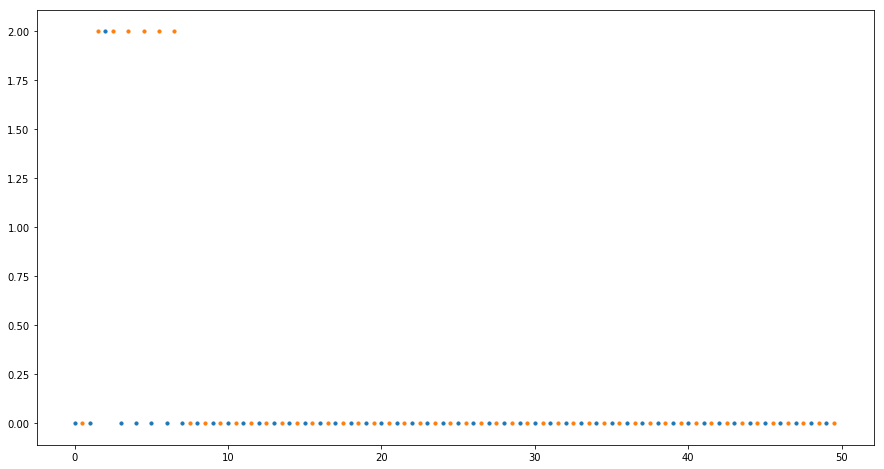

In [75]:
plot_map_mle_decisions(0)

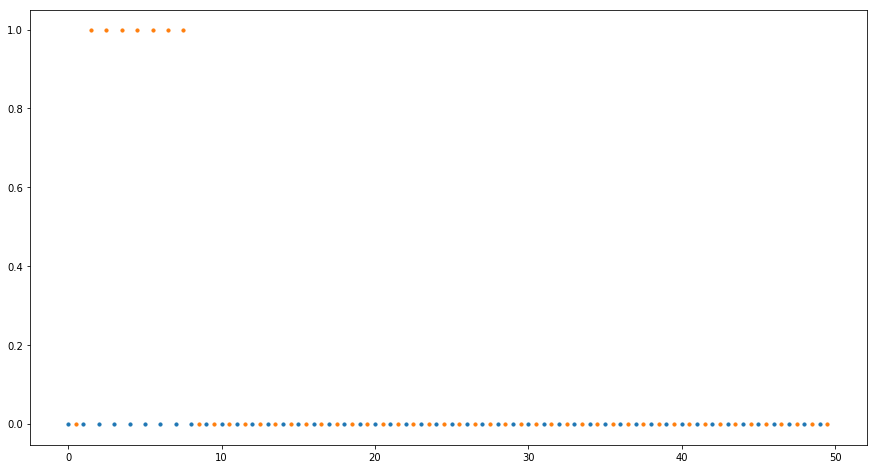

In [76]:
plot_map_mle_decisions(1)

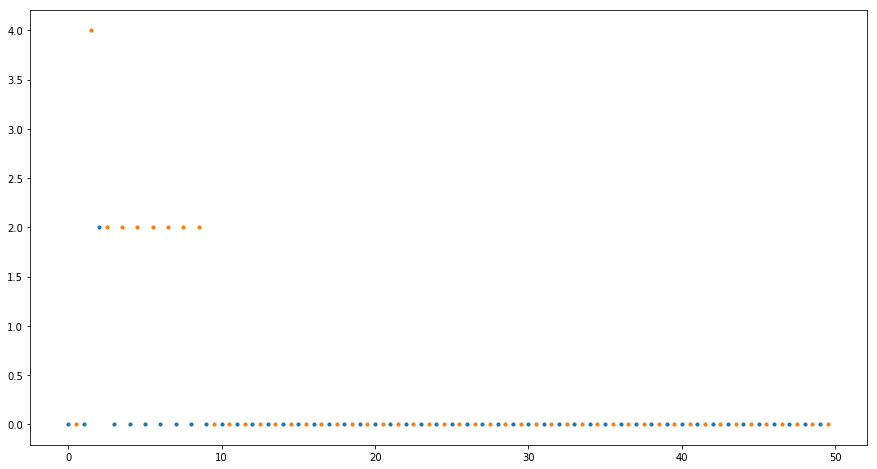

In [77]:
plot_map_mle_decisions(2)

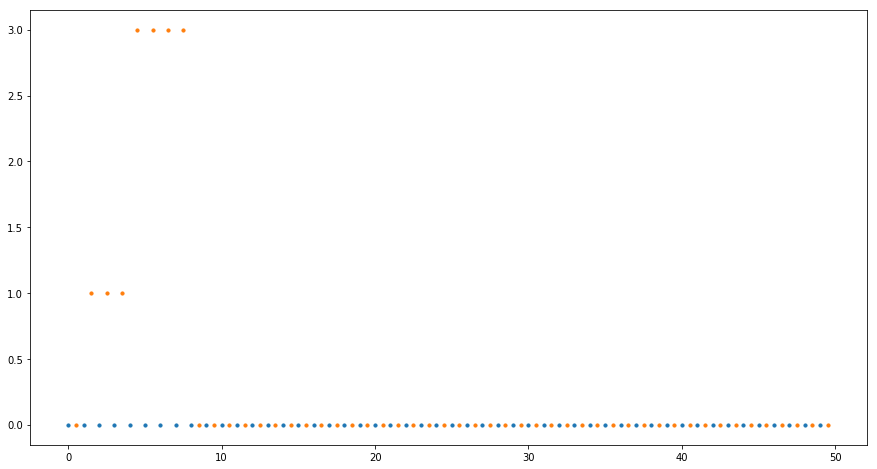

In [80]:
plot_map_mle_decisions(3)

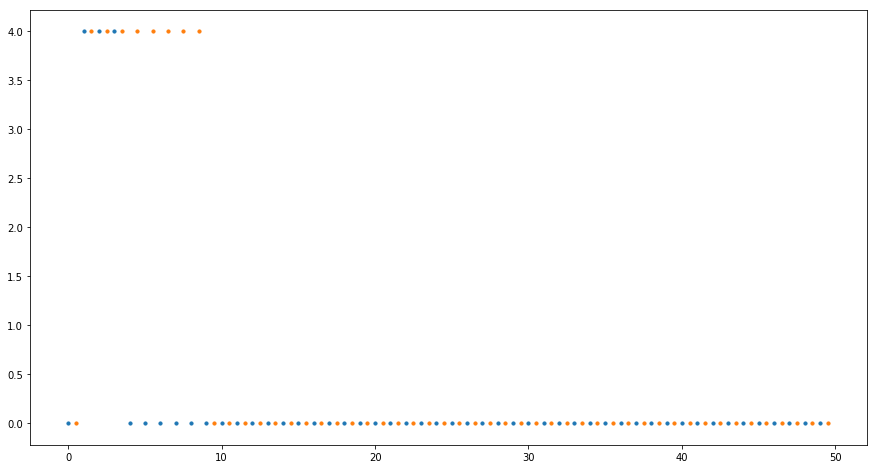

In [82]:
plot_map_mle_decisions(4)

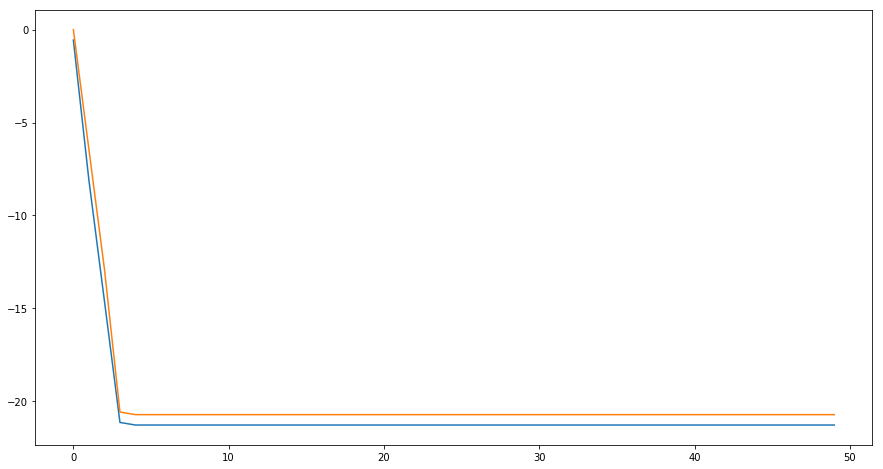

In [94]:
plot_map_mle_values(0)

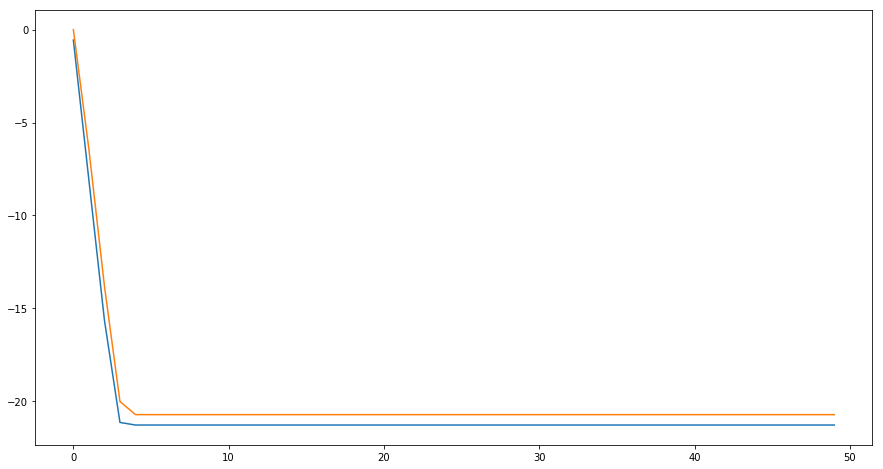

In [95]:
plot_map_mle_values(1)

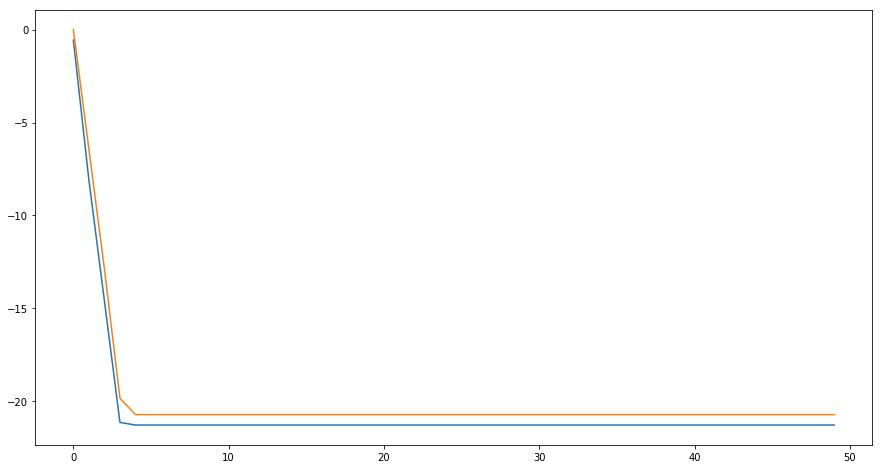

In [96]:
plot_map_mle_values(2)

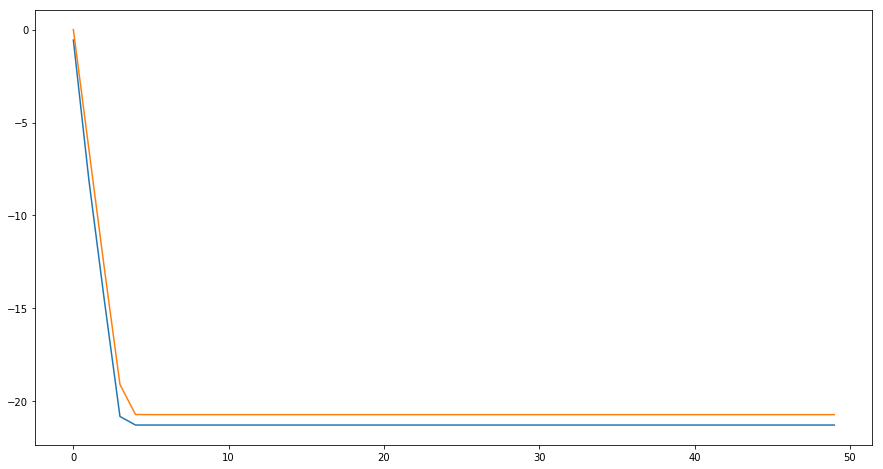

In [97]:
plot_map_mle_values(3)

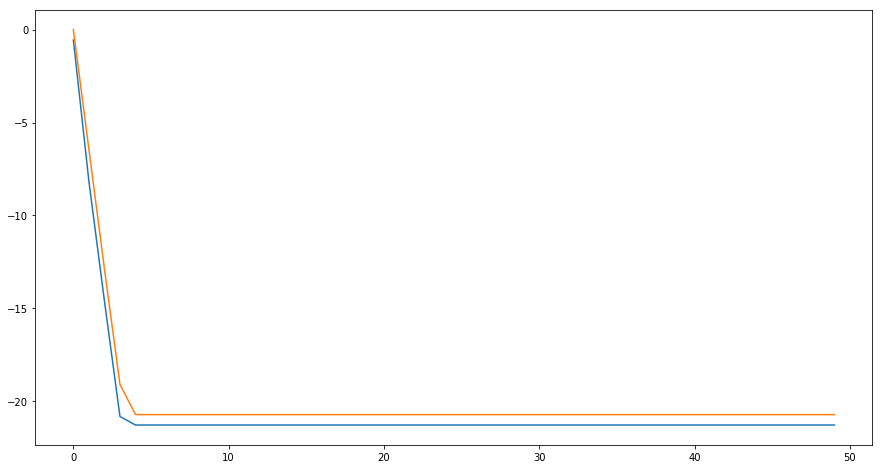

In [98]:
plot_map_mle_values(4)